In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

In [3]:
# Load data (no headers in original file)
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv('../data/adult.data', header=None, names = columns, na_values=' ?')



In [4]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Initial Data Inspection

#Check for data types and missing values
df.info()

#Generating summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

workclass         1836
occupation        1843
native-country     583
dtype: int64


In [9]:
# Data Cleaning

# Analyzing missing values in workclass
print(df['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [12]:
#Optinon 1: Drop rows with missing values
#df_cleaned = df.dropna()

# Option 2: Fill missing values with the mode(most common value)
for column in ['workclass', 'occupation', 'native-country']:
    df[column] = df[column].fillna(df[column].mode()[0])

#verifying that there are no missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
#Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Removing duplicates
if duplicate_count > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 24


In [17]:
#Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates}")

Number of duplicate rows after removal: 0


In [21]:
# List of categorical columns to convert
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country', 'income']

# Convert to 'category' dtype safely using .loc
for column in categorical_columns:
    df.loc[:, column] = df[column].astype('category')

# Verifying the changes
print(df.dtypes)


age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object


In [ ]:
# Handling Inconsistent datas

# Check unique values in categorical columns
for column in categorical_columns:
    print(f"\n{column}: {df[column].nunique()} unique values")
    print(df[column].value_counts().head())


workclass: 8 unique values
workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Name: count, dtype: int64

education: 16 unique values
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
Name: count, dtype: int64

marital-status: 7 unique values
marital-status
Married-civ-spouse    14970
Never-married         10667
Divorced               4441
Separated              1025
Widowed                 993
Name: count, dtype: int64

occupation: 14 unique values
occupation
Prof-specialty     5979
Craft-repair       4094
Exec-managerial    4065
Adm-clerical       3768
Sales              3650
Name: count, dtype: int64

relationship: 6 unique values
relationship
Husband          13187
Not-in-family     8292
Own-child         5064
Unmarried         3445
Wife              1568
Name: count, dtype: int64

race: 5 unique values
race
White            

In [24]:
# Standardize the 'income' column (remove spaces and periods)
df['income'] = df['income'].str.strip()
print(df['income'].unique())

['<=50K' '>50K']


C:\Users\Vijayaragavan\AppData\Local\Temp\ipykernel_31072\288802832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].str.strip()


In [25]:
# Summary statistics of numerical columns
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_columns].describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


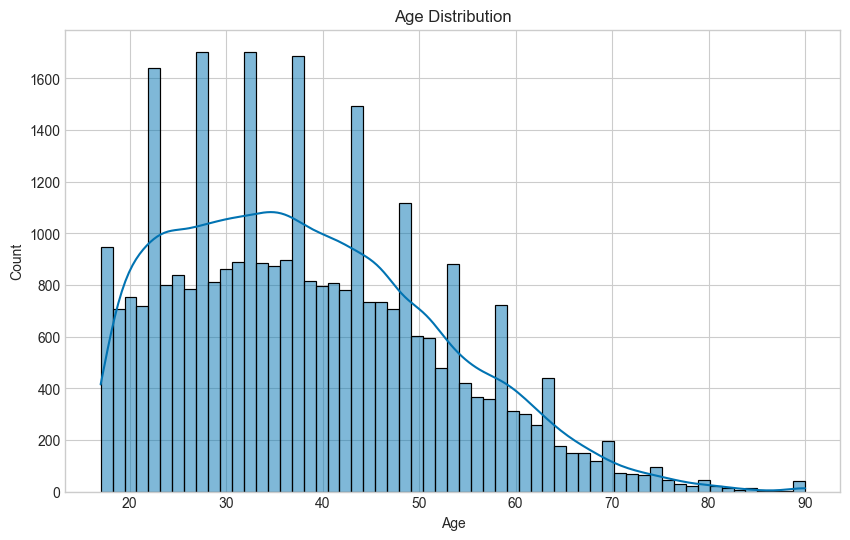

In [26]:
# Exploratory Data Analysis (EDA)

# Univariate Analysis (analyzing one variable at a time)

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

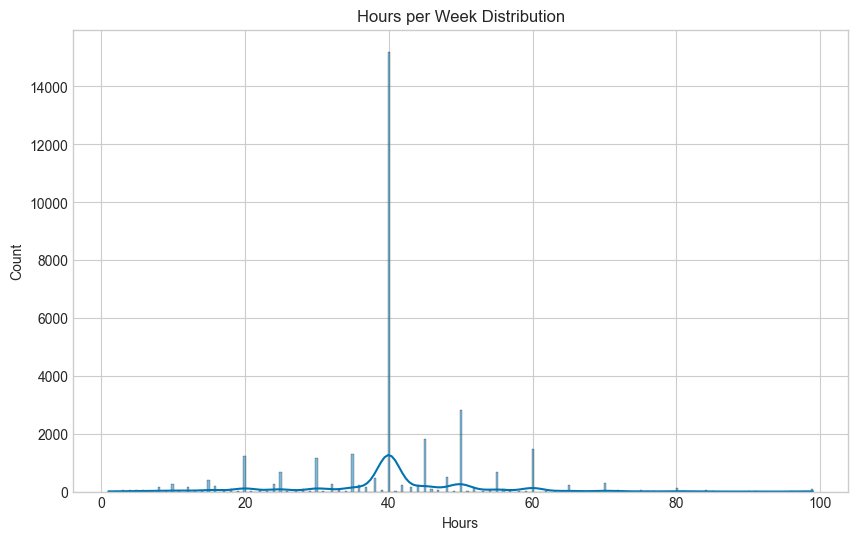

In [28]:
# Hours per week distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

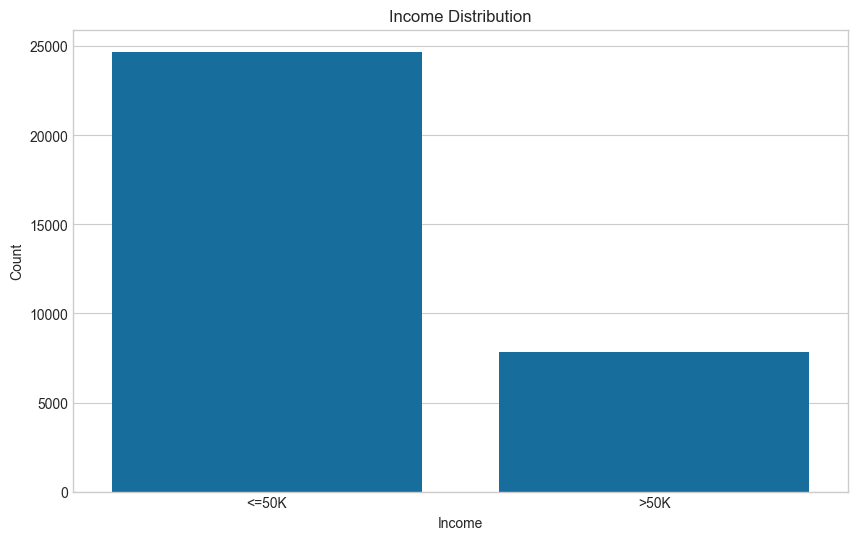

In [29]:
# Income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['income'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

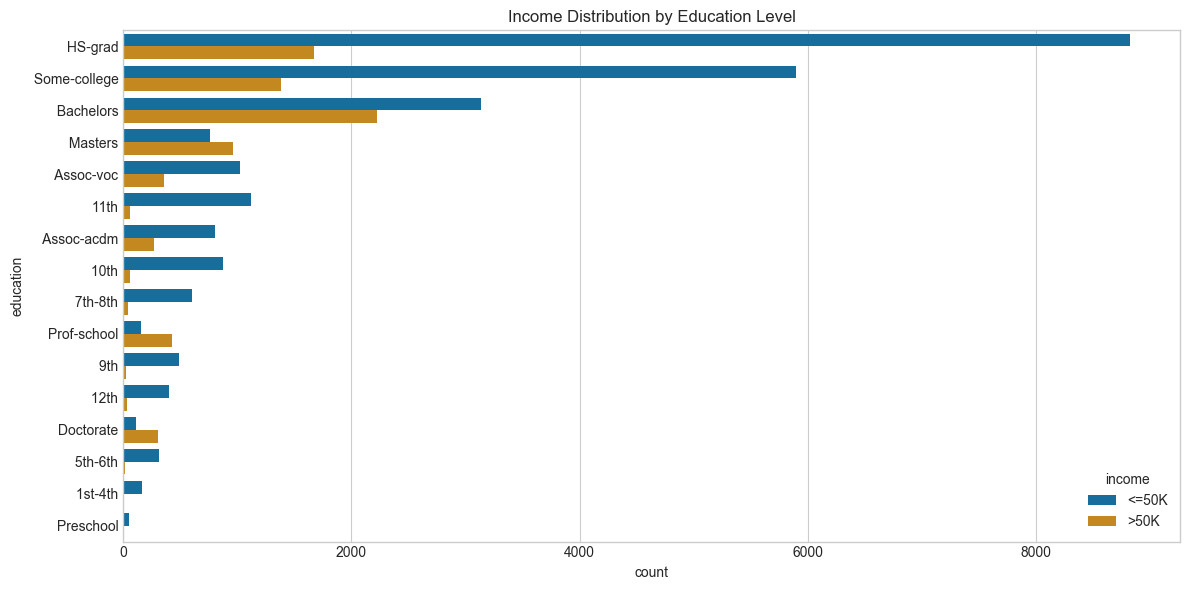

In [32]:
# Bivariate Analysis (analyzing two variables together)

# Income vs. Education
plt.figure(figsize=(12, 6))
sns.countplot(y='education', hue='income', data=df, order = df['education'].value_counts().index)
plt.title('Income Distribution by Education Level')
plt.tight_layout()
plt.show()

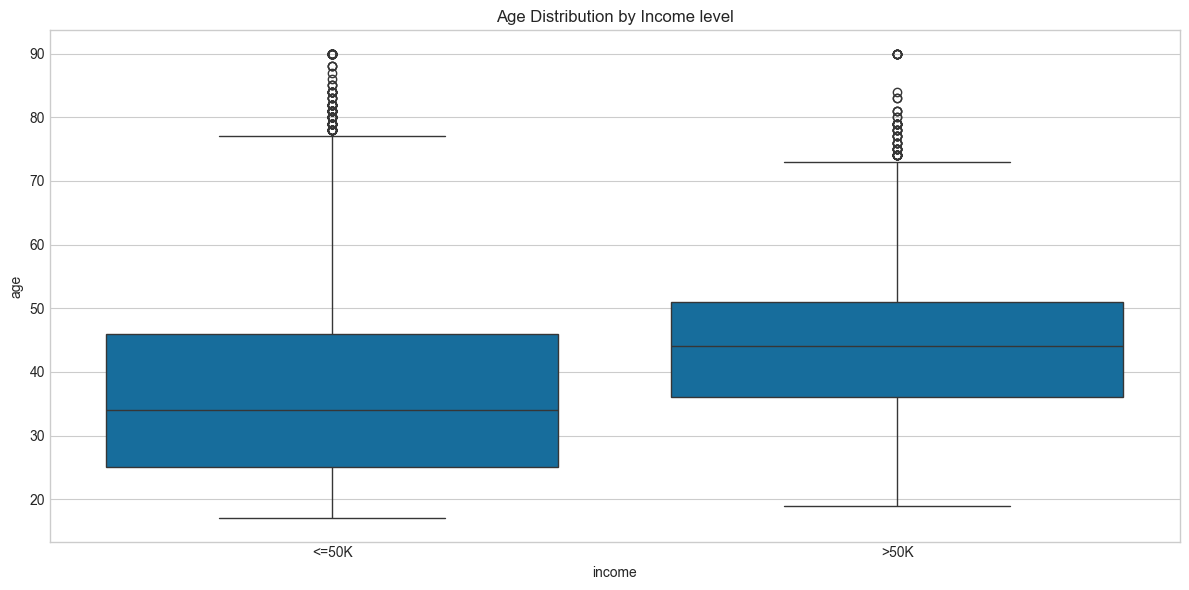

In [36]:
# Income vs. Age
plt.figure(figsize=(12,6))
sns.boxplot(x='income', y='age', data = df)
plt.title("Age Distribution by Income level")
plt.tight_layout()
plt.show()

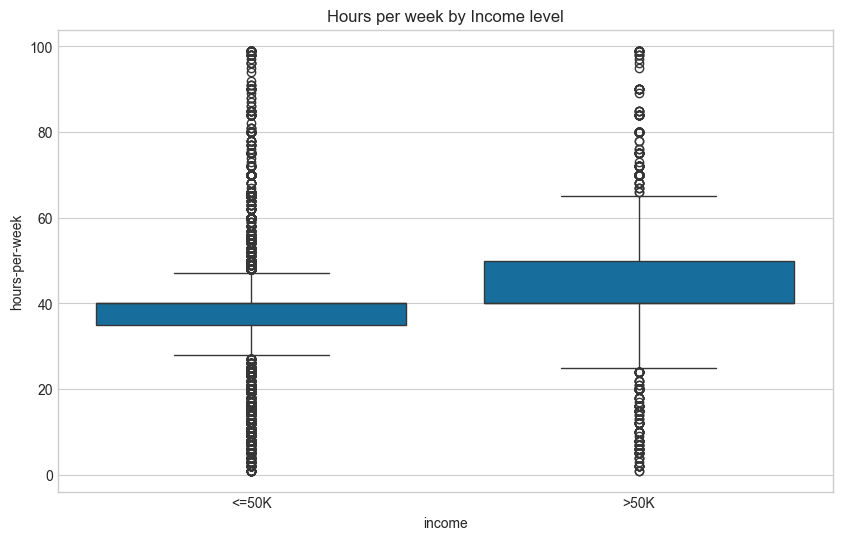

In [37]:
# Income vs Hours Per Week
plt.figure(figsize = (10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Hours per week by Income level")
plt.show()

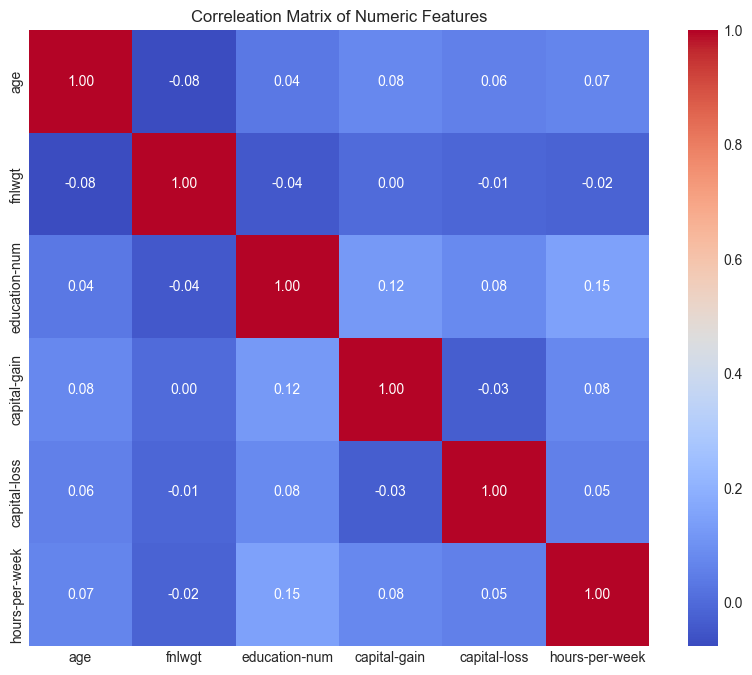

In [40]:
# Correlation Analysis for Numeric Features
numeric_df = df.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize = (10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title('Correleation Matrix of Numeric Features')
plt.show()